## Regresión Avanzada
## Clase 1

In [13]:
suppressMessages( library( corrplot ) )
suppressMessages( library( dplyr ) )
suppressMessages( library( MVN ) )
suppressMessages( library( ggplot2 ) )
suppressMessages( library( knitr ) )
suppressMessages( library( kableExtra) )

## 1. Asociación entre variables

### Ejemplo 1: Publicidad-Ventas

Interesa estudiar la existencia de correlación lineal entre la inversión en publicidad (X) y los ingresos de la empresa (W) con este objetivo se recogieron los datos correspondientes a ambas variables en un grupo de empresas nacionales con locales en shoppings.

### Los datos

In [28]:
# Incorporamos los datos
X = c( 60, 61, 61, 62, 63, 64, 65, 68, 70 )
W = c( 125, 130, 120, 135, 130, 140, 140, 160, 169 )
data = data.frame(X, W)

### Plot

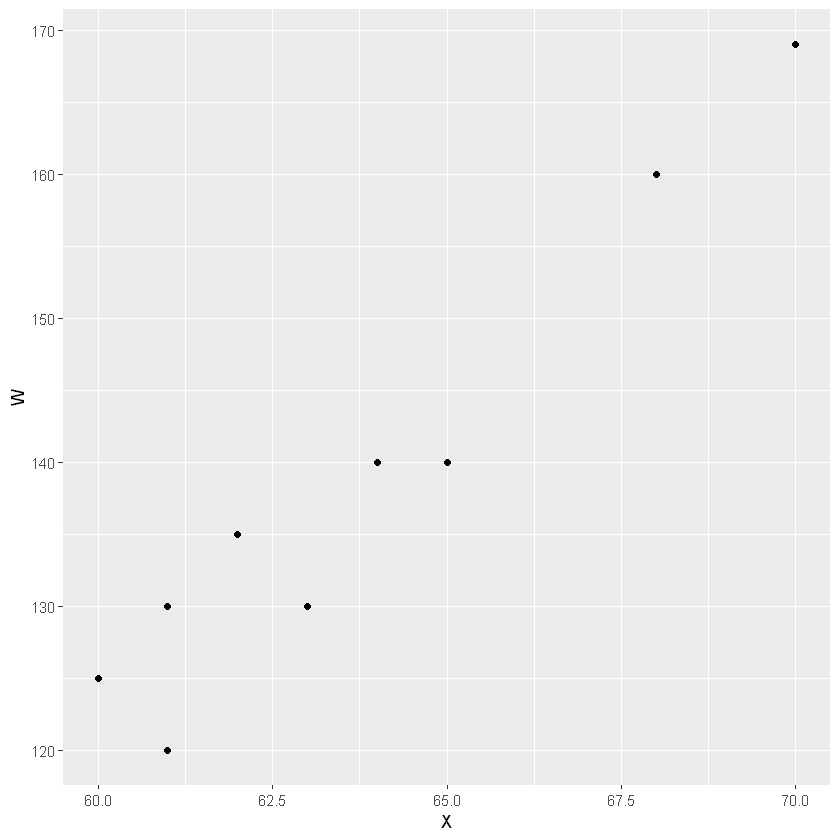

In [32]:
# Polt
ggplot(data = data, mapping = aes(x = X, y = W))+
  geom_point()

### Salida

In [25]:
# Guardamos los resultados del Test Henze-Zirkler en el objeto result
result <- mvn(data, mvnTest = "hz")

# Mostramos los resultados
print( result$multivariateNormality )

           Test        HZ   p value MVN
1 Henze-Zirkler 0.4992344 0.1198209 YES


Puede sostenerse el supuesto distribucional normal bivariado para estas variables.

In [5]:
cor( X, W )

[1] 0.9665763

In [6]:
cor.test( X, W )


	Pearson's product-moment correlation

data:  X and W
t = 9.9748, df = 7, p-value = 2.175e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8446666 0.9931627
sample estimates:
      cor 
0.9665763 


Nota: Este estadístico sólo es válido utilizarlo para testear hipótesis para Rho con respecto a cero (sea la alternativa: distinto, menor o mayor) pero no corresponde utilizarlo para hipótesis donde Rho es diferente de cero.

### Ejemplo 2: Relación no Lineal

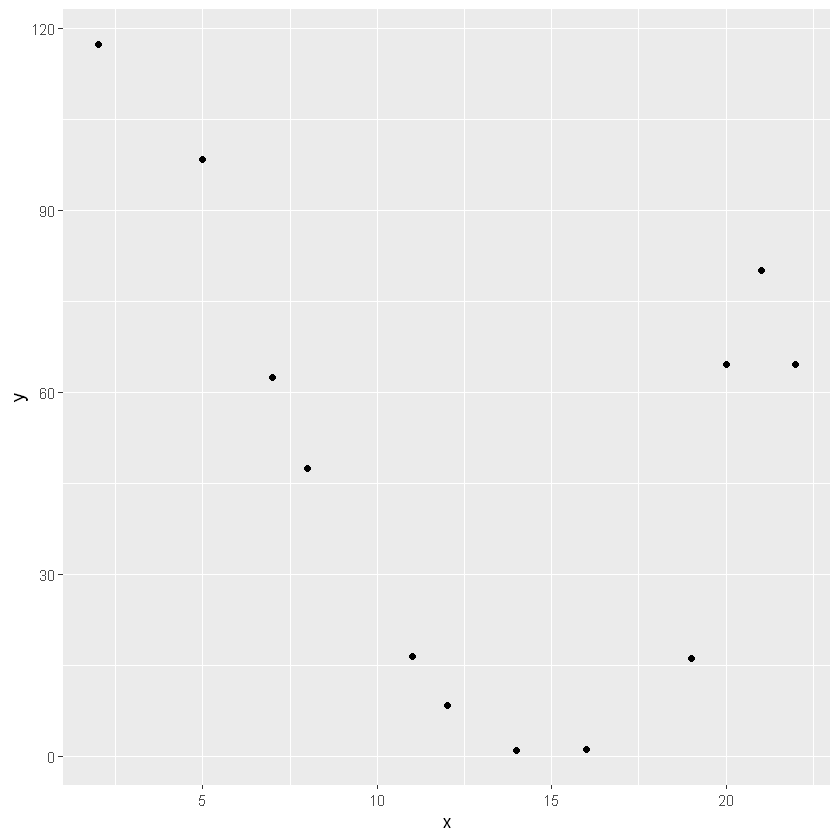

In [35]:
# Incorporamos los datos
x = c( 2, 5, 7, 8, 11, 12, 14, 16, 19, 20, 21, 22 )
y = c( 117.40, 98.50, 62.58, 47.45, 16.58, 8.39, 1.11, 1.18, 16.16, 64.71, 80.2, 64.7 )

data = data.frame(x, y)
# Polt
ggplot( data = data, mapping = aes(x = x, y = y) ) +
  geom_point()

### Ejemplo 3: Nicotina

In [37]:
x = c( 196.5, 199.1, 199.9, 204.2 ,204.2, 207.4, 234.1, 181.7 ,183, 192.8 )
y = c( 0.76, 1.11, 1.66, 0.96, 1.21, 1.14, 1.53, 1.51, 1.28, 0.84 )
suppressWarnings( cor.test( x, y, method = 'spearman' ) )


	Spearman's rank correlation rho

data:  x and y
S = 140.93, p-value = 0.6876
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1458973 


Interpretación del coeficiente de Spearman
La interpretación de este coeficiente es similar a la Pearson:

* Valores próximos a **1** indican una correlación fuerte y positiva.

* Valores próximos a **–1** indican una correlación fuerte y negativa.

* Valores próximos a **cero** indican que no hay correlación lineal.

### Correlación dentro de una base

Para analizar la correlación de a pares entre varias variables de una base disponemos del recurso del correlograma que hace un poco más visual este análisis.
Datos de calificacione de estudiantes

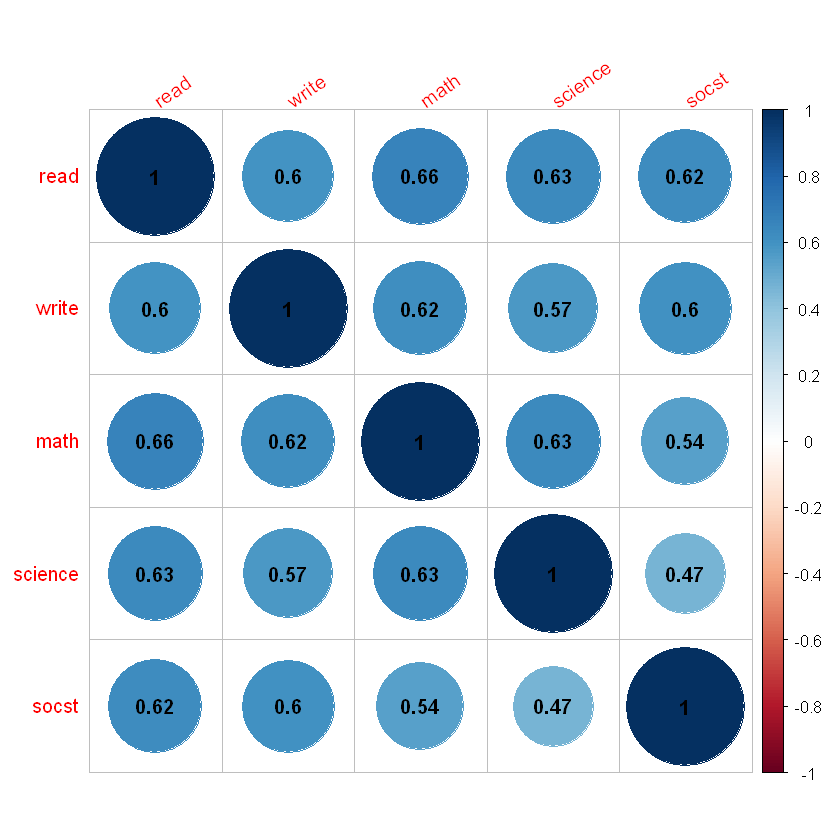

In [12]:
estud = read.csv("C:/Austral/mcd-reg-adv/datasets/estud.csv")

base_est = estud %>% select( read, write, math, science, socst )
M = cor( base_est )

corrplot( M, tl.col = "red",
    bg = "white",
    tl.srt = 35,
    addCoef.col = "black",
    type = "full" )

En todos los casos la asociación entre las variables es positiva en algunos casos es más fuerte que en otros, por ejemplo es muy bajo en ciencia con estudios sociales y más alto en matemática con lectura.

### Ejemplo 4: Damascos

### Estimación e Interpretación del modelo


Call:
lm(formula = PESOF ~ LONGF, data = hojas)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6242 -2.5943  0.5176  1.8973  5.1117 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -25.3171     5.8569  -4.323 0.000702 ***
LONGF         1.7098     0.1403  12.186 7.68e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.175 on 14 degrees of freedom
Multiple R-squared:  0.9138,	Adjusted R-squared:  0.9077 
F-statistic: 148.5 on 1 and 14 DF,  p-value: 7.677e-09


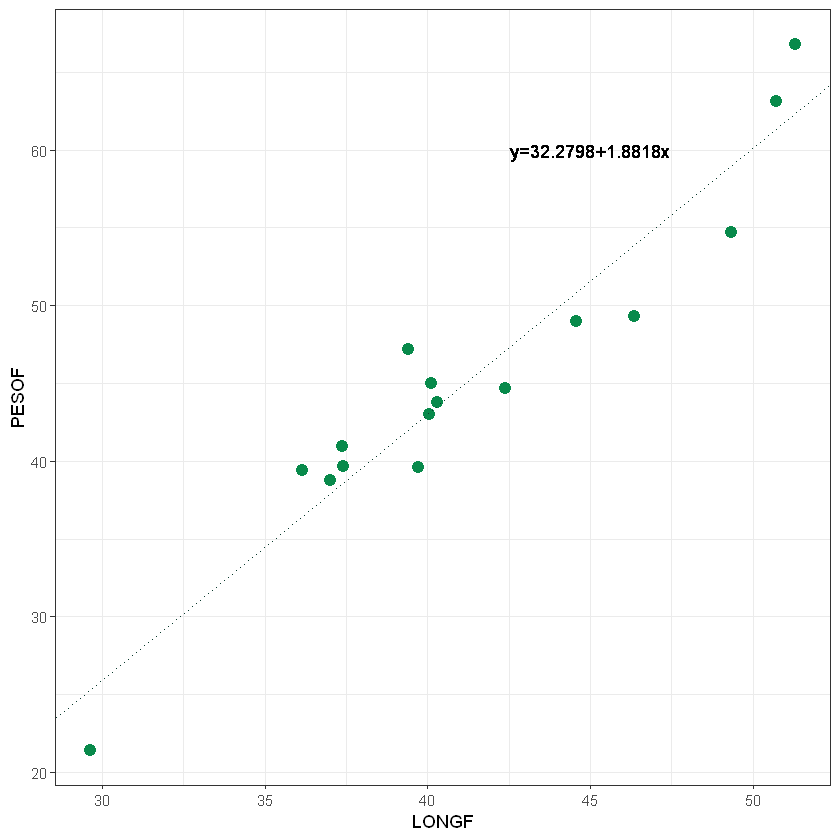

In [19]:
SUPHOJA <- c( 44.09, 36.67, 51.72, 36.04, 38.97, 41.28, 42.06, 53.33, 40.14, 39.31, 33.53, 36.88, 36.94, 34.13, 42.03, 41.55 )
PESOF <- c( 49.29, 49, 43.04, 66.79, 63.11, 43.8, 39.63, 44.98, 21.44, 38.75, 40.96, 39.39, 54.7, 44.65, 39.65, 47.16 )
LONGF <- c( 46.34, 44.58, 40.06, 51.3, 50.7, 40.29, 39.71, 40.1, 29.63, 37, 37.38, 36.14, 49.33, 42.37, 37.4, 39.4 )

hojas <- data.frame( SUPHOJA, PESOF, LONGF )

mod_hojas <- lm( PESOF ~ LONGF, data=hojas )
summary( mod_hojas )

coef <- mod_hojas$coefficients

ggplot( hojas, aes( x=LONGF,y=PESOF ) ) +
    geom_point(size=3,col="#088A4B") + 
    theme_bw() +
    geom_abline( intercept=coef[1], slope=coef[2], col="#0B3B2E", linetype = "dotted" ) +
    geom_text ( x=45, y=60, label="y=32.2798+1.8818x" )

In [20]:
print( anova( mod_hojas ) )

Analysis of Variance Table

Response: PESOF
          Df  Sum Sq Mean Sq F value    Pr(>F)    
LONGF      1 1497.07 1497.07   148.5 7.677e-09 ***
Residuals 14  141.14   10.08                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Hallamos el intervalo de confianza para una nueva observación con longitud del fruto LONGF = −34.3 de nivel 95%

In [22]:
nuevo <- data.frame( LONGF = 34.3)
print( predict( object=mod_hojas, newdata=nuevo, interval="confidence", level=0.95 ) )

       fit      lwr      upr
1 33.32839 30.60627 36.05052


## 3. Estimación e Interpretación del modelo

### Bandas de Confianza y Predicción

Realizamos esto sobre el recorrido de la variable predictora:

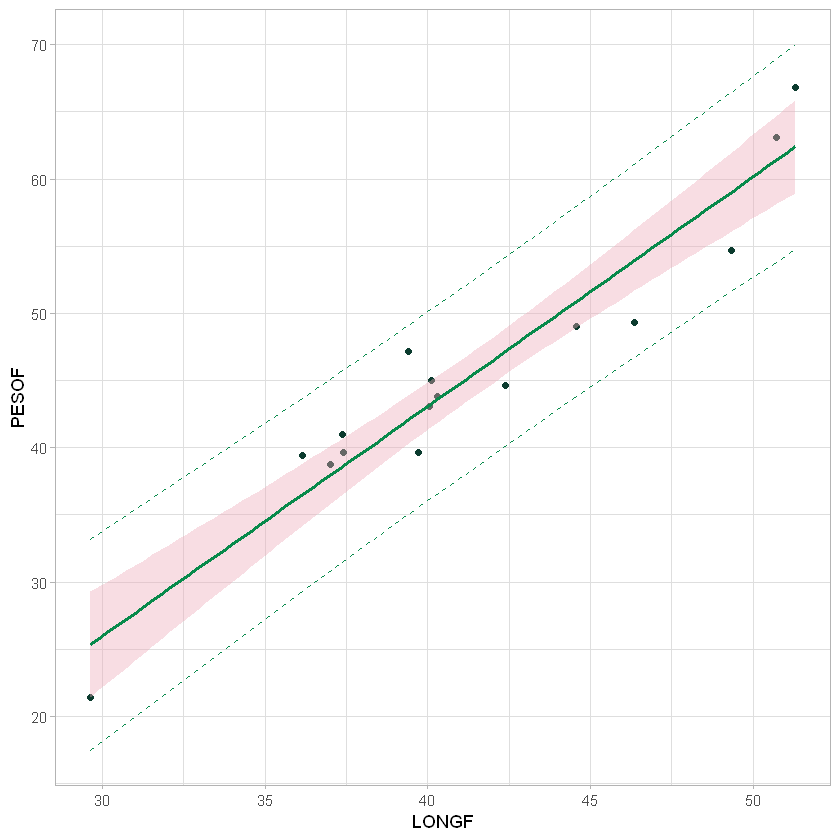

In [24]:
suppressWarnings( predichos <- predict( object = mod_hojas, interval = "prediction", level = 0.95 ) )
nuevos_datos <- data.frame( hojas, predichos )

ggplot( nuevos_datos, aes( x=LONGF, y=PESOF ) )+
    geom_point( col="#0B3B2E" ) +
    geom_line( aes( y=lwr ), color="#088A4B" , linetype="dashed" ) +
    geom_line( aes( y=upr ), color="#088A4B" , linetype="dashed" ) +
    geom_smooth( method=lm, formula=y~x, se=TRUE, level=0.95, col="#088A4B", fill="pink2") +
    theme_light()

In [ ]:
#Fin script